<a href="https://colab.research.google.com/github/A2Eweb/computer_voila/blob/master/Copy_of_02_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd '/content/drive/My Drive/course-v4/nbs'

/content/drive/My Drive/course-v4/nbs


In [24]:
!git clone https://github.com/fastai/course-v4 

fatal: destination path 'course-v4' already exists and is not an empty directory.


In [0]:
!pip install graphviz ipywidgets matplotlib nbdev>=0.2.12 pandas scikit_learn azure-cognitiveservices-search-imagesearch sentencepiece

In [26]:
!pip install git+https://github.com/fastai/fastai2 
!pip install git+https://github.com/fastai/fastcore


  Cloning https://github.com/fastai/fastai2 to /tmp/pip-req-build-8xzmirqv
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-8xzmirqv
  Created wheel for fastai2: filename=fastai2-0.0.18-cp36-none-any.whl size=192909 sha256=07fe8b31d4d1dfe539a8833823092516a4e5f0cc711cde375148e49b0fb8211e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qn3xgvn/wheels/a1/59/9a/50335b36924b827e29d5f40b41fc3a008cc1f30dd80e560dfd
Successfully built fastai2
  Cloning https://github.com/fastai/fastcore to /tmp/pip-req-build-viot6xlt
  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-viot6xlt
  Created wheel for fastcore: filename=fastcore-0.1.18-cp36-none-any.whl size=28855 sha256=1b95f73c1404cd9d0cd2133c6e2e241e9a65d5437e708ff3f8391b58a632a675
  Stored in directory: /tmp/pip-ephem-wheel-cache-1sbs1z6m/wheels/8a/2a/23/bc50c8f5e28776b44ac837a01fcfa675724565d4813d8e51c7
Successfully built fastcore


In [0]:
#hide
from utils import *
from fastai2.vision.widgets import  *

In [0]:
!git config --global user.name "ajayi"
!git config --global user.email ajayi.anwansedo@gmail.com

In [0]:
!git add -A

In [30]:
!git commit -m "new comment"

[master cb24d52] new comment
 1 file changed, 33 insertions(+), 46 deletions(-)


In [31]:
!git commit

On branch master
Your branch is ahead of 'origin/master' by 8 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [32]:
!cd '/content/drive/My Drive/course-v4/nbs' && git pull

Already up to date.


In [0]:
!pip install graphviz ipywidgets matplotlib nbdev>=0.2.12 pandas scikit_learn azure-cognitiveservices-search-imagesearch sentencepiece

# From model to production

## The practice of deep learning

### Starting your project

### The state of deep learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

### The Drivetrain approach

## Gathering data

To download images with Bing Image Search, you should sign up at Microsoft for *Bing Image Search*. You will be given a key, which you can either paste here, replacing "XXX":

In [0]:
key = 'a3bb4adf3b894998843a16db999fdd98'

In [35]:
search_images_bing

<function utils.search_images_bing>

In [36]:
results = search_images_bing(key, 'conputers')
ims = results.attrgot('content_url')
len(ims)

ErrorResponseException: ignored

In [0]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [0]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

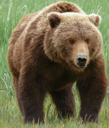

In [0]:
im = Image.open(dest)
im.to_thumb(128,128)

In [0]:
computers_types = 'desktop','laptop','palmtop'
path = Path('computers')

In [0]:
if not path.exists():
    path.mkdir()
    for o in computers_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} computers')
        download_images(dest, urls=results.attrgot('content_url'))

In [0]:
fns = get_image_files(path)
fns

(#440) [Path('computers/desktop/00000000.jpg'),Path('computers/desktop/00000005.jpg'),Path('computers/desktop/00000004.jpg'),Path('computers/desktop/00000007.jpg'),Path('computers/desktop/00000002.jpeg'),Path('computers/desktop/00000009.jpg'),Path('computers/desktop/00000003.jpg'),Path('computers/desktop/00000008.jpeg'),Path('computers/desktop/00000010.jpeg'),Path('computers/desktop/00000006.jpg')...]

In [0]:
failed = verify_images(fns)
failed

(#0) []

In [0]:
failed.map(Path.unlink);

### Sidebar: Getting help in jupyter notebooks

### End sidebar

## From data to DataLoaders

In [0]:
computers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [0]:
dls = computers.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


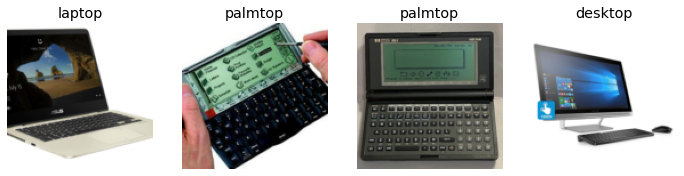

In [0]:
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


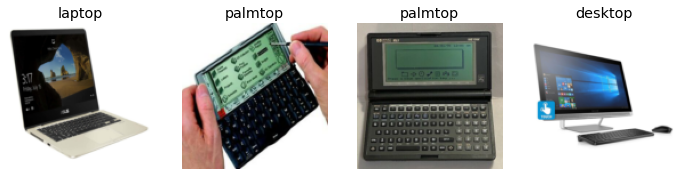

In [0]:
computers = computers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = computers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [22]:
computers = computers.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = computers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

NameError: ignored

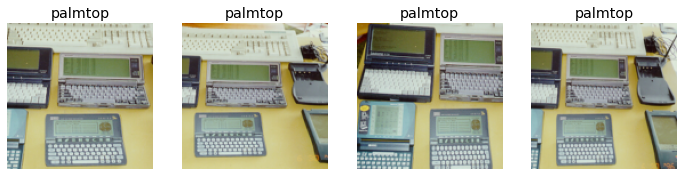

In [0]:
computers = computers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = computers.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data augmentation

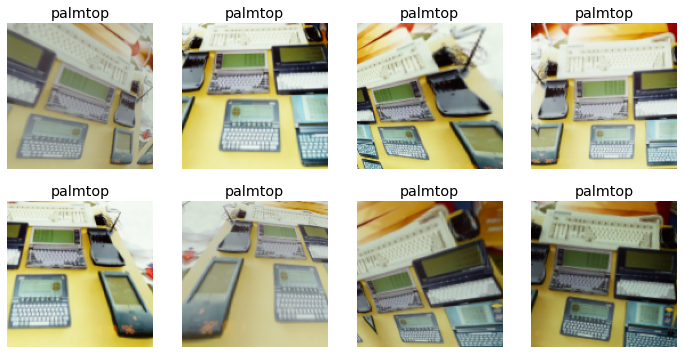

In [0]:
computers = computers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = computers.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training your model, and using it to clean your data

In [0]:
computers = computers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = computers.dataloaders(path)

In [0]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.625281,1.426155,0.439394,01:05


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.790349,0.725515,0.287879,01:25
1,0.642100,0.568313,0.166667,01:25
2,0.540722,0.416662,0.106061,01:26
3,0.465375,0.336422,0.106061,01:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


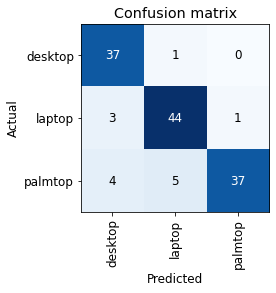

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

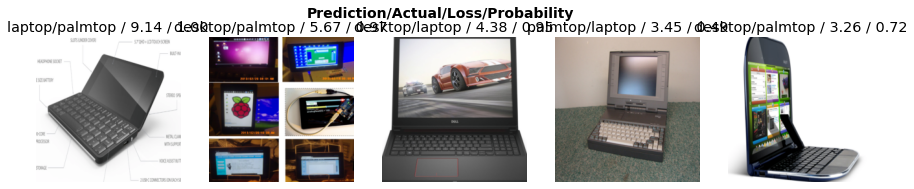

In [0]:
interp.plot_top_losses(5, nrows=1)

In [0]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning your model into an online application

### Using the model for inference

In [0]:
learn.export()

In [37]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [0]:
learn_inf = load_learner(path/'export.pkl')

In [39]:
learn_inf.predict('images/grizzly.jpg')

('palmtop', tensor(2), tensor([0.0280, 0.0791, 0.8929]))

In [40]:
learn_inf.dls.vocab

(#3) ['desktop','laptop','palmtop']

### Creating a Notebook app from the model

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/00000004.jpg'])

In [0]:
img = PILImage.create(btn_upload.data[-1])

In [44]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: palmtop; Probability: 0.8690')

In [47]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [0]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [0]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [50]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning your notebook into a real app

In [51]:
#hide
!pip install voila
# !jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 5.9MB 2.8MB/s 
     |████████████████████████████████| 921kB 30.5MB/s 
     |████████████████████████████████| 184kB 49.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


### Deploying your app

## How to avoid disaster

### Unforeseen consequences and feedback loops

## Get writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly, due to structural or style differences to the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain approach?
1. How do the steps of the Drivetrain approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between crop, pad, and squish resize approaches? When might you choose one over the other?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are 3 examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out of domain data"?
1. What is "domain shift"?
1. What are the 3 steps in the deployment process?
1. For a project you're interested in applying deep learning to, consider the thought experiment "what would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.

### Further research

1. Consider how the Drivetrain approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?